In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Read data

In [5]:
root = '../input'
df_name = 'final_df_2020-12-03_16-45-50.csv'
df = pd.read_csv(os.path.join(root, df_name))

In [6]:
df.time = pd.to_datetime(df.time)

In [7]:
df.head()

,topic,measurement,aircraft_id,cicle,time,setting1,setting2,setting3,s1,s2,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,/data,aircrafts,cd9d9a0d-3e91-4cb8-bf29-95d2c438bf53,19,2020-12-03 10:49:35+00:00,0.0013,0.0005,100.0,473.571070,591.108595,...,483.372175,2186.130950,7318.831254,7.495255,0.027673,365.211709,2225.881249,93.075014,35.455799,22.306129
1,/data,aircrafts,6ac3d559-200c-45f2-b3af-a04a1d1e759d,17,2020-12-03 10:49:36+00:00,0.0025,-0.0004,100.0,461.982120,560.730791,...,442.668943,2092.719358,7033.759201,7.542264,0.027236,343.092520,2068.875199,88.037151,33.204910,20.245498
2,/data,aircrafts,d1b77a39-a6f2-40d7-856a-d2cf2a8e66c9,13,2020-12-03 10:49:37+00:00,0.0006,0.0005,100.0,478.380856,594.917288,...,492.018430,2156.599498,7365.802871,7.953740,0.028180,365.779702,2276.852237,91.859368,35.678618,21.996184
3,/data,aircrafts,dd9b95d9-a9ba-4f3c-91bc-c8f679e01384,12,2020-12-03 10:49:38+00:00,-0.0025,0.0004,100.0,462.526786,569.943328,...,474.098862,2155.995666,7119.628028,7.561611,0.027248,353.664412,2183.276094,87.531446,34.590907,21.219175
4,/data,aircrafts,81619ee8-5dc0-4d51-8e19-b0e72f79e612,8,2020-12-03 10:49:39+00:00,-0.0055,-0.0002,100.0,484.791406,608.575570,...,488.878156,2209.735864,7306.991915,7.821272,0.028240,368.871288,2186.807935,93.527457,36.016414,22.176172


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10263 entries, 0 to 10262
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   topic        10263 non-null  object             
 1   measurement  10263 non-null  object             
 2   aircraft_id  10263 non-null  object             
 3   cicle        10263 non-null  int64              
 4   time         10263 non-null  datetime64[ns, UTC]
 5   setting1     10263 non-null  float64            
 6   setting2     10263 non-null  float64            
 7   setting3     10263 non-null  float64            
 8   s1           10263 non-null  float64            
 9   s2           10263 non-null  float64            
 10  s3           10263 non-null  float64            
 11  s4           10263 non-null  float64            
 12  s5           10263 non-null  float64            
 13  s6           10263 non-null  float64            
 14  s7           10263 non

# Format summary data for each aircraft

In [10]:
# all unique id aircrafts
id_aircrafts = df.aircraft_id.unique()

In [12]:
id_aircrafts.shape

(96,)

In [7]:
# choice data for one aircrafts
one_data = df[df.aircraft_id == np.random.choice(id_aircrafts)]
one_data.shape

(13, 29)

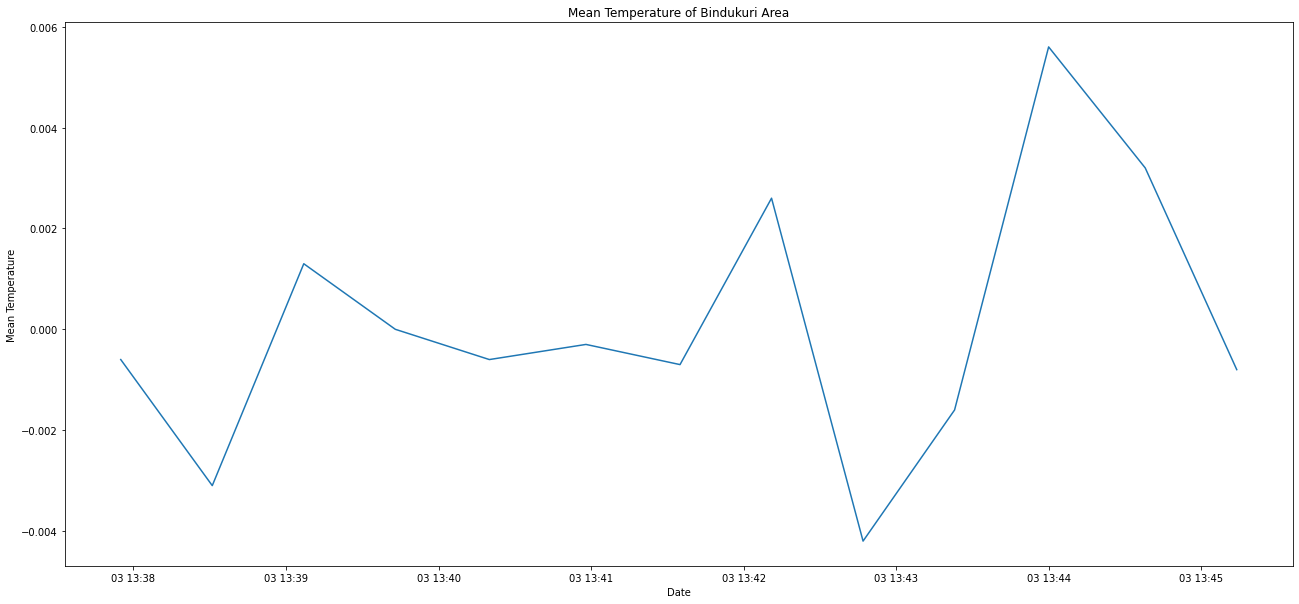

In [8]:
plt.figure(figsize=(22,10))
plt.plot(one_data.time, one_data.setting1)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [117]:
data = []
for aircraft_id in np.random.choice(df['aircraft_id'].unique(), 30):
    asset_df = df[(df['aircraft_id'] == aircraft_id)]

    data.append(go.Scatter(
        x = asset_df['time'].dt.strftime(date_format='%m-%d-%r').values,
        y = asset_df['cicle'].values,
        name = asset
    ))
layout = go.Layout(dict(title = "Cycle of 30 random aircraft_id",
                  xaxis = dict(title = 'Time'),
                  yaxis = dict(title = 'Cycle'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [110]:
data = []
#market_train_df['close'] = market_train_df['close'] / 20

for col in df.columns[8:]:
#     price_df = df[col]
#     print(price_df.groups)

    data.append(go.Scatter(
        x = one_data['time'].dt.strftime(date_format='%m-%d-%r').values,
        y = one_data[col].values,
        name = f'{col} data'
    ))
    
layout = go.Layout(dict(title = "Trends of value by data channel",
                  xaxis = dict(title = 'Time'),
                  yaxis = dict(title = 'Value'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [109]:
data = []
#market_train_df['close'] = market_train_df['close'] / 20

for col in df.columns[8:]:
#     price_df = df[col]
#     print(price_df.groups)

    data.append(go.Scatter(
        x = one_data['time'].dt.strftime(date_format='%m-%d-%r').values,
        y = (one_data[col].values - one_data[col].values.mean()) / one_data[col].values.std(),
        name = f'{col} data'
    ))
    
    
layout = go.Layout(dict(title = "Trends of value by data channel",
                  xaxis = dict(title = 'Time'),
                  yaxis = dict(title = 'Value'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [101]:
data = []
#market_train_df['close'] = market_train_df['close'] / 20

for col in df.columns[5:7]:
#     price_df = df[col]
#     print(price_df.groups)

    data.append(go.Scatter(
        x = one_data['time'].dt.strftime(date_format='%%m-d-%r').values,
        y = one_data[col].values,
        name = f'{col} data'
    ))
    
    
layout = go.Layout(dict(title = "Trends of value by data channel",
                  xaxis = dict(title = 'Time'),
                  yaxis = dict(title = 'Value'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')